In [1]:
import pandas as pd
import numpy as np

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_


stat_path = './scalability_test.csv'
df = pd.read_csv(stat_path)


df1 = df.groupby('n_dags').agg({'runtime': ['min', 'max', 'mean', 'std',  percentile(50), percentile(95)]})
df1.fillna(0, inplace=True)

df1

runtime                                                          
             min       max      mean       std percentile_50 percentile_95
n_dags                                                                    
2       0.000151  0.274632  0.091683  0.158439      0.000265      0.247195
3       0.044171  0.044171  0.044171  0.000000      0.044171      0.044171
4       0.005661  0.908013  0.239357  0.446025      0.021877      0.777479
5       0.015611  0.748708  0.072767  0.087505      0.057780      0.080158
6       0.016654  0.147441  0.073500  0.049055      0.064463      0.135879
7       0.030303  0.123854  0.080270  0.019349      0.083938      0.104790
8       0.180110  0.180110  0.180110  0.000000      0.180110      0.180110
9       0.039927  0.201834  0.143079  0.040984      0.145007      0.189562
10      0.089968  0.385038  0.196759  0.112265      0.157143      0.347916
11      0.094988  0.251283  0.190797  0.055037      0.196673      0.246278
12      0.165677  0.222111  0.200646  0.023914      0.211987      0.220810
13      0.037352  0.290363  0.116195  0.088893      0.086052      0.245404
14      0.039793  0.356505  0.207947  0.089485      0.217393      0.329191
15      0.042155  0.341913  0.129025  0.096193      0.074078      0.305114
16      0.069296  0.318715  0.195360  0.081718      0.185072      0.304603
17      0.050080  0.405758  0.129095  0.138862      0.064546      0.337539
18      0.052416  0.218760  0.135531  0.073094      0.162431      0.212551
19      0.063072  0.485142  0.179430  0.136953      0.142552      0.415242
20      0.101715  0.689434  0.228329  0.229398      0.131899      0.569408
21      0.124294  1.409068  0.296532  0.235775      0.215591      0.684447
22      0.136933  0.757878  0.225848  0.135518      0.182570      0.550485
23      0.123048  1.449658  0.274730  0.254448      0.204031      0.609996
24      0.171899  1.099480  0.341970  0.258876      0.226291      0.841415
25      0.176168  0.538026  0.298223  0.097624      0.293435      0.452230
26      0.146741  0.950300  0.270054  0.144340      0.243842      0.395212
27      0.139854  0.356481  0.216103  0.053274      0.203482      0.332724
28      0.168707  1.058378  0.291905  0.182211      0.231874      0.633966
29      0.182597  1.232744  0.291200  0.184776      0.229715      0.625606
30      0.174271  1.255511  0.301892  0.179709      0.250156      0.487861
31      0.147573  0.665670  0.310432  0.154121      0.268352      0.608269
...          ...       ...       ...       ...           ...           ...
124     2.771484  2.771484  2.771484  0.000000      2.771484      2.771484
126     4.165515  4.165515  4.165515  0.000000      4.165515      4.165515
127     2.830604  2.830604  2.830604  0.000000      2.830604      2.830604
129     3.075969  3.075969  3.075969  0.000000      3.075969      3.075969
130     3.273176  3.495808  3.384492  0.157425      3.384492      3.484676
132     3.562334  3.660502  3.611418  0.069415      3.611418      3.655594
133     4.327820  4.327820  4.327820  0.000000      4.327820      4.327820
134     3.594477  3.594477  3.594477  0.000000      3.594477      3.594477
135     3.684866  3.684866  3.684866  0.000000      3.684866      3.684866
136     3.501858  3.501858  3.501858  0.000000      3.501858      3.501858
137     4.271575  4.271575  4.271575  0.000000      4.271575      4.271575
138     3.764308  3.764308  3.764308  0.000000      3.764308      3.764308
139     3.532205  3.532205  3.532205  0.000000      3.532205      3.532205
140     3.703930  3.703930  3.703930  0.000000      3.703930      3.703930
141     4.615707  4.615707  4.615707  0.000000      4.615707      4.615707
142     4.151483  4.151483  4.151483  0.000000      4.151483      4.151483
146     4.776246  4.776246  4.776246  0.000000      4.776246      4.776246
147     3.741429  3.741429  3.741429  0.000000      3.741429      3.741429
148     4.283027  4.283027  4.283027  0.000000      4.283027      4.283027
149     4.845250  4.845250  4.8452

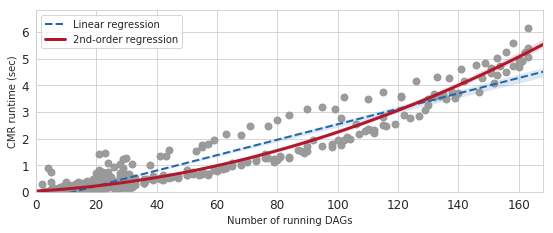

In [10]:
import seaborn as sns; 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8,3))

sns.regplot(ax=ax, x='n_dags', y = 'runtime' , data=df, marker="o",
            scatter_kws={'s': 45, 'color':'#999999', 'label':'Word count'},
            line_kws={'color': '#2166ac', 'lw':2, 'ls': '--', 'label':'Linear regression'})


sns.regplot(ax=ax, x='n_dags', y = 'runtime' , data=df, marker="o", order=2,
            scatter_kws={'s': 45, 'color':'#999999', 'label':'Word count'},
            line_kws={'color': '#b2182b', 'lw': 3, 'label':'2nd-order regression'})

ax.set_xlim(left=0, right=168)
ax.set_ylim(bottom=0)
ax.set_xlabel("Number of running DAGs")
ax.set_ylabel("CMR runtime (sec)")
ax.legend()
ax.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(left=0.1, bottom=0.13, right=0.98, top=0.97)
plt.savefig('/local0/papers/KARIZ/OSDI20/Figures/fig_mirab_overhead_vs_ndag.pdf', format='pdf', dpi=200)
plt.savefig('/local0/papers/KARIZ/OSDI20/Figures/fig_mirab_overhead_vs_ndag.png', format='png', dpi=200)

plt.legend()
plt.show()

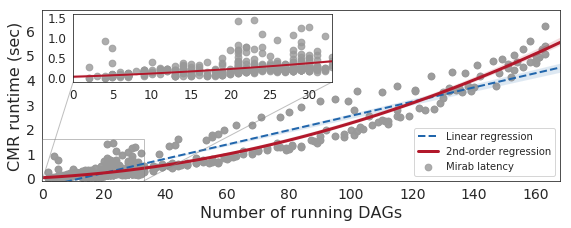

In [11]:
import matplotlib.pyplot as plt
import numpy as np


sns.set_style("white")

fig, ax = plt.subplots(figsize=[8, 3])

sns.regplot(ax=ax, x='n_dags', y = 'runtime' , data=df, marker="o", label = 'Mirab latency',
            scatter_kws={'s': 45, 'color':'#999999', 'label':'Word count'},
            line_kws={'color': '#2166ac', 'lw':2, 'ls': '--', 'label':'Linear regression'})

sns.regplot(ax=ax, x='n_dags', y = 'runtime' , data=df, marker="o", order=2,
            scatter_kws={'s': 45, 'color':'#999999', 'label':'Word count'},
            line_kws={'color': '#b2182b', 'lw': 3, 'label':'2nd-order regression'})

ax.set_xlabel("Number of running DAGs", fontsize=16)
ax.set_ylabel("CMR runtime (sec)", fontsize=16)
ax.yaxis.set_ticks([0, 1, 2, 3, 4, 5, 6])
ax.legend()


# inset axes....
axins = ax.inset_axes([0.06, 0.58,0.5,0.4])

sns.regplot(ax=axins, x='n_dags', y = 'runtime' , data=df, marker="o", order=2,
            scatter_kws={'s': 45, 'color':'#999999', 'label':'Word count'},
            line_kws={'color': '#b2182b', 'lw': 2, 'label':'2nd-order regression'})

axins.set_xlabel('')
axins.set_ylabel('')

# sub region of the original image
x1, x2, y1, y2 = 1, 33, -.1, 1.6
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.xaxis.set_ticks([0, 5, 10, 15, 20, 25, 30])
axins.yaxis.set_ticks([0, 0.5, 1, 1.5])
axins.tick_params(axis='both', which='major', labelsize=12)

ax.indicate_inset_zoom(axins)

ax.set_xlim(left=0, right=168)
ax.set_ylim(bottom=-0.1)
ax.tick_params(axis='both', which='major', labelsize=14)


plt.subplots_adjust(left=0.08, bottom=0.18, right=0.98, top=0.97)
plt.savefig('/local0/papers/KARIZ/OSDI20/Figures/fig_mirab_overhead_vs_ndag_sb.pdf', format='pdf', dpi=200)
plt.savefig('/local0/papers/KARIZ/OSDI20/Figures/fig_mirab_overhead_vs_ndag_sb.png', format='png', dpi=200)

plt.show()